In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/deevy/Desktop/archive/WomensClothingReviews.csv")
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Data Exploration and Transformation

In [10]:
df.columns,df.shape, df.dtypes

(Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
        'Recommended IND', 'Positive Feedback Count', 'Division Name',
        'Department Name', 'Class Name'],
       dtype='object'),
 (23486, 10),
 Clothing ID                 int64
 Age                         int64
 Title                      object
 Review Text                object
 Rating                      int64
 Recommended IND             int64
 Positive Feedback Count     int64
 Division Name              object
 Department Name            object
 Class Name                 object
 dtype: object)

In [11]:
df.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.isna().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [14]:
df.shape

(19662, 10)

In [15]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [19]:
df['Division Name'].value_counts(),df['Department Name'].value_counts(),df['Class Name'].value_counts()

(General           11664
 General Petite     6778
 Initmates          1220
 Name: Division Name, dtype: int64,
 Tops        8713
 Dresses     5371
 Bottoms     3184
 Intimate    1408
 Jackets      879
 Trend        107
 Name: Department Name, dtype: int64,
 Dresses           5371
 Knits             3981
 Blouses           2587
 Sweaters          1218
 Pants             1157
 Jeans              970
 Fine gauge         927
 Skirts             796
 Jackets            598
 Lounge             574
 Swim               293
 Outerwear          281
 Shorts             260
 Sleep              174
 Legwear            131
 Intimates          120
 Layering           115
 Trend              107
 Casual bottoms       1
 Chemises             1
 Name: Class Name, dtype: int64)

<AxesSubplot:title={'center':'Unique features per Value'}>

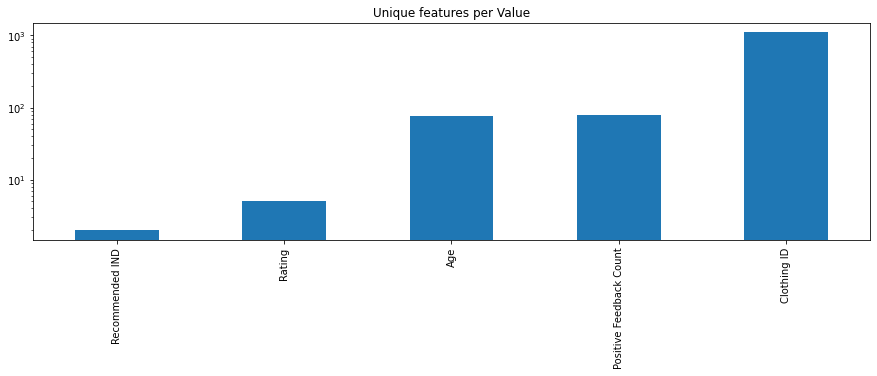

In [22]:
unique_values= df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15,4), title="Unique features per Value")

In [23]:
df.duplicated().sum()

0

# Text Cleaning

In [24]:
import re
import string

sentence =  'Just bought a dress'

def text_cleaner(text): # Remove square brackets, punctuation and numbers
    if not isinstance(text, float):
        text = text.lower()
        text = text.replace('\n', ' ')
        text = re.sub('\[.*?\]','',text) 
        text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
        text = re.sub('\w*\d\w*','',text)
        text = re.sub('[‘’“”…]','',text)
    else:
        text = sentence
    return text

cleaner = lambda x: text_cleaner(x)

In [25]:
df['cleaned_Title'] = pd.DataFrame(df['Title'].apply(cleaner))
df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_Title
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,some major design flaws
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,my favorite buy
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,flattering shirt
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,not for the very petite
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,cagrcoal shimmer fun


In [26]:
df['cleaned_Review'] = pd.DataFrame(df['Review Text'].apply(cleaner))
df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_Title,cleaned_Review
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,some major design flaws,i had such high hopes for this dress and reall...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,my favorite buy,i love love love this jumpsuit its fun flirty ...
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,flattering shirt,this shirt is very flattering to all due to th...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,not for the very petite,i love tracy reese dresses but this one is not...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...


# Sentiment Analysis 

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
def analyze_sentiment(clean_text):
    score = SentimentIntensityAnalyzer().polarity_scores(clean_text)
    if score['pos'] > score['neg']: 
        return 1
    else: 
        return 0
    
analyzer = lambda x: analyze_sentiment(x)

In [29]:
df['sentiment_Title'] = pd.DataFrame(df['cleaned_Title'].apply(analyzer))
df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_Title,cleaned_Review,sentiment_Title
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,some major design flaws,i had such high hopes for this dress and reall...,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,my favorite buy,i love love love this jumpsuit its fun flirty ...,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,flattering shirt,this shirt is very flattering to all due to th...,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,not for the very petite,i love tracy reese dresses but this one is not...,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,1


In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deevy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [32]:
stop_words = set(stopwords.words('english'))
df['cleaned_Review_Sw'] = df['cleaned_Review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [33]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_Title,cleaned_Review,sentiment_Title,cleaned_Review_Sw
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,some major design flaws,i had such high hopes for this dress and reall...,0,high hopes dress really wanted work initially ...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,my favorite buy,i love love love this jumpsuit its fun flirty ...,1,love love love jumpsuit fun flirty fabulous ev...
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,flattering shirt,this shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,not for the very petite,i love tracy reese dresses but this one is not...,0,love tracy reese dresses one petite feet tall ...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...


In [34]:
df['sentiment_Review'] = pd.DataFrame(df['cleaned_Review'].apply(analyzer))
df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_Title,cleaned_Review,sentiment_Title,cleaned_Review_Sw,sentiment_Review
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,some major design flaws,i had such high hopes for this dress and reall...,0,high hopes dress really wanted work initially ...,1
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,my favorite buy,i love love love this jumpsuit its fun flirty ...,1,love love love jumpsuit fun flirty fabulous ev...,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,flattering shirt,this shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,not for the very petite,i love tracy reese dresses but this one is not...,0,love tracy reese dresses one petite feet tall ...,1
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,1,aded basket hte last mintue see would look lik...,1


# Visualisation

In [35]:
val_counts1 = df['sentiment_Title'].value_counts()
print(val_counts1)
val_counts2 = df['sentiment_Review'].value_counts()
print(val_counts2)

1    13667
0     5995
Name: sentiment_Title, dtype: int64
1    18328
0     1334
Name: sentiment_Review, dtype: int64


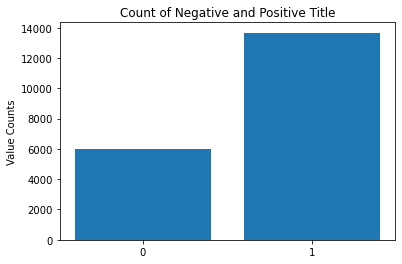

In [38]:
fig, ax = plt.subplots()
ax.bar(val_counts1.index, val_counts1.values)
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_ylabel('Value Counts')
ax.set_title('Count of Negative and Positive Title')
plt.show()

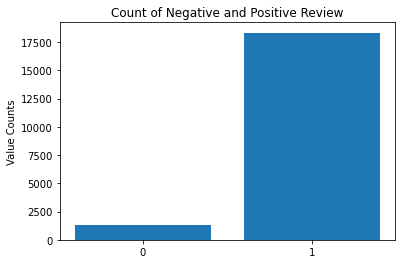

In [39]:
fig, ax = plt.subplots()
ax.bar(val_counts2.index, val_counts2.values)
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_ylabel('Value Counts')
ax.set_title('Count of Negative and Positive Review')
plt.show()

In [40]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_Title,cleaned_Review,sentiment_Title,cleaned_Review_Sw,sentiment_Review
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,some major design flaws,i had such high hopes for this dress and reall...,0,high hopes dress really wanted work initially ...,1
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,my favorite buy,i love love love this jumpsuit its fun flirty ...,1,love love love jumpsuit fun flirty fabulous ev...,1


In [42]:
classNameRating = df.groupby('Class Name')['Rating'].agg(['count','mean']).sort_values(by='count',ascending=False).reset_index()[:10]
classNameRating

,Class Name,count,mean
0,Dresses,5371,4.137032
1,Knits,3981,4.133384
2,Blouses,2587,4.152300
3,Sweaters,1218,4.165025
4,Pants,1157,4.281763
5,Jeans,970,4.349485
6,Fine gauge,927,4.255663
7,Skirts,796,4.244975
8,Jackets,598,4.306020
9,Lounge,574,4.292683
